## Importing Libraries and Setup

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# creating path variable
path = r'/Users/paigepearson/Desktop/Data Analytics/Immersion Course/Achievement 4/Instacart Basket Analysis'

In [3]:
# importing final data from 4.9
df_instacart = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'instacart_merged.pkl'))

In [4]:
# removing PII data as before
df_insta = df_instacart.drop(columns = ['first_name', 'last_name', '_merge'])

In [5]:
# creating age_flag
df_insta.loc[df_insta['age'] >= 65, 'age_flag'] = 'Senior'
df_insta.loc[(df_insta['age'] < 65) & (df_insta['age'] >= 40), 'age_flag'] = 'Middle Aged'
df_insta.loc[(df_insta['age'] < 40) & (df_insta['age'] >= 26), 'age_flag'] = 'Adult'
df_insta.loc[(df_insta['age'] < 26) & (df_insta['age'] >= 18), 'age_flag'] = 'Young Adult'

In [6]:
# creating income flag
df_insta.loc[df_insta['income'] >= 150000, 'income_flag'] = 'High Income'
df_insta.loc[(df_insta['income'] < 150000) & (df_insta['income'] >= 50000), 'income_flag'] = 'Middle Income'
df_insta.loc[df_insta['income'] < 50000, 'income_flag'] = 'Low Lncome'

In [7]:
# creating kid flag
df_insta.loc[df_insta['number_of_dependants'] == 0, 'kid_flag'] = 'Childless'
df_insta.loc[df_insta['number_of_dependants'] != 0, 'kid_flag'] = 'Has Child'

In [8]:
# creating time flag for order-periods of the day, based on chart 'Total Orders by Hour'
df_insta.loc[(df_insta['order_hour_of_day'] >= 0) & (df_insta['order_hour_of_day'] < 6), 'time_flag'] = 'Morning Lull'
df_insta.loc[(df_insta['order_hour_of_day'] >= 6) & (df_insta['order_hour_of_day'] < 9), 'time_flag'] = 'Morning Rise'
df_insta.loc[(df_insta['order_hour_of_day'] >= 9) & (df_insta['order_hour_of_day'] < 18), 'time_flag'] = 'Peak'
df_insta.loc[(df_insta['order_hour_of_day'] >= 18) & (df_insta['order_hour_of_day'] <= 23), 'time_flag'] = 'Evening Fall'

In [9]:
# import dataframe with departments
df_dep = pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'departments_wrangled.csv'))

In [10]:
df_dep.head()

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [11]:
# renaming column
df_dep.rename(columns = {'Unnamed: 0': 'department_id'}, inplace = True)

In [12]:
# merging both dataframes
df_merged = df_insta.merge(df_dep, on = 'department_id')

In [13]:
# allowing all columns to be seen
pd.set_option('display.max_columns', None)

In [14]:
df_merged.head()

,user_id,gender,state,age,date_joined,number_of_dependants,marital_status,income,order_id,eval_set,order_number,order_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_spent,spending_flag,median_orders,order_frequency_flag,age_flag,income_flag,kid_flag,time_flag,department
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,prior,5,1,9,30.0,196,2,0,Soda,77,7,9.0,Mid-range,Regularly busy,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Middle Aged,High Income,Has Child,Peak,beverages
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,prior,7,5,15,11.0,196,1,1,Soda,77,7,9.0,Mid-range,Regularly busy,Regular days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Middle Aged,High Income,Has Child,Peak,beverages
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584,prior,8,1,15,10.0,196,2,1,Soda,77,7,9.0,Mid-range,Regularly busy,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Middle Aged,High Income,Has Child,Peak,beverages
3,33890,Female,New Mexico,36,1/1/2017,0,single,59285,1044841,prior,3,6,11,30.0,196,1,0,Soda,77,7,9.0,Mid-range,Regularly busy,Regular days,Most orders,12,Regular customer,7.057534,Low spender,26.0,Non-frequent customer,Adult,Middle Income,Childless,Peak,beverages
4,33890,Female,New Mexico,36,1/1/2017,0,single,59285,474720,prior,4,1,20,16.0,196,6,1,Soda,77,7,9.0,Mid-range,Regularly busy,Busiest days,Average orders,12,Regular customer,7.057534,Low spender,26.0,Non-frequent customer,Adult,Middle Income,Childless,Evening Fall,beverages


In [15]:
df_insta['time_flag'].value_counts()

Peak            23205725
Evening Fall     5703141
Morning Rise     2899665
Morning Lull      596328
Name: time_flag, dtype: int64

## Creating Charts 

Note: At this point I am creating charts that I feel will support the various project objective prompts found in the project brief, and redoing old charts that needed editing. My computer has been struggling to run python and so this section will be broken up into the remaining parts to save my poor laptop.

I will be first focusing on the amount of orders each department has based on the time flag I created.

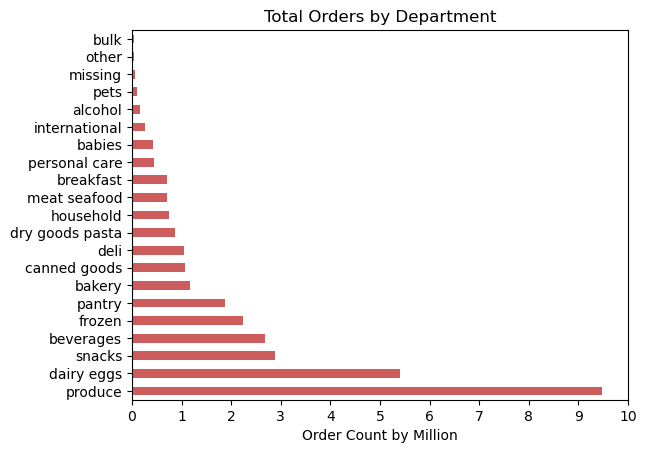

In [19]:
# creating bar chart on spending habits for all orders and departments
bar_dep_habits = df_merged['department'].value_counts().plot.barh(stacked = True, color = ['indianred'])
plt.title('Total Orders by Department')
plt.xlabel('Order Count by Million', fontsize=10)
plt.xticks([0, 1000000, 2000000, 3000000, 4000000, 5000000, 6000000, 7000000, 8000000, 9000000, 10000000], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
plt.show()

In [16]:
# creating subsets based on time_flag categories - Morning Lull
df_lull = df_merged[df_merged['time_flag'] == 'Morning Lull']

In [17]:
# checking work
df_lull.head()

,user_id,gender,state,age,date_joined,number_of_dependants,marital_status,income,order_id,eval_set,order_number,order_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_spent,spending_flag,median_orders,order_frequency_flag,age_flag,income_flag,kid_flag,time_flag,department
464,127020,Female,Ohio,35,1/1/2017,3,married,68933,1771256,prior,35,5,3,1.0,3957,1,1,100% Raw Coconut Water,31,7,8.8,Mid-range,Regularly busy,Regular days,Fewest orders,41,Loyal customer,9.446305,Low spender,2.0,Frequent customer,Adult,Middle Income,Has Child,Morning Lull,beverages
480,127020,Female,Ohio,35,1/1/2017,3,married,68933,1771256,prior,35,5,3,1.0,25466,3,1,Water,115,7,13.5,Mid-range,Regularly busy,Regular days,Fewest orders,41,Loyal customer,9.446305,Low spender,2.0,Frequent customer,Adult,Middle Income,Has Child,Morning Lull,beverages
516,127020,Female,Ohio,35,1/1/2017,3,married,68933,1771256,prior,35,5,3,1.0,48015,2,1,Lime Slim Can,115,7,12.8,Mid-range,Regularly busy,Regular days,Fewest orders,41,Loyal customer,9.446305,Low spender,2.0,Frequent customer,Adult,Middle Income,Has Child,Morning Lull,beverages
604,168047,Female,Alaska,37,1/1/2017,3,married,73158,3059243,prior,3,2,3,8.0,37215,8,0,100% Cranberry Juice,98,7,7.5,Mid-range,Regularly busy,Regular days,Fewest orders,8,New customer,9.212162,Low spender,14.0,Regular customer,Adult,Middle Income,Has Child,Morning Lull,beverages
743,31590,Female,Montana,46,1/1/2017,0,single,154076,2652777,prior,28,6,5,4.0,25438,5,0,Guava Nectar,31,7,10.5,Mid-range,Regularly busy,Regular days,Fewest orders,38,Regular customer,58.139865,High spender,8.0,Frequent customer,Middle Aged,High Income,Childless,Morning Lull,beverages


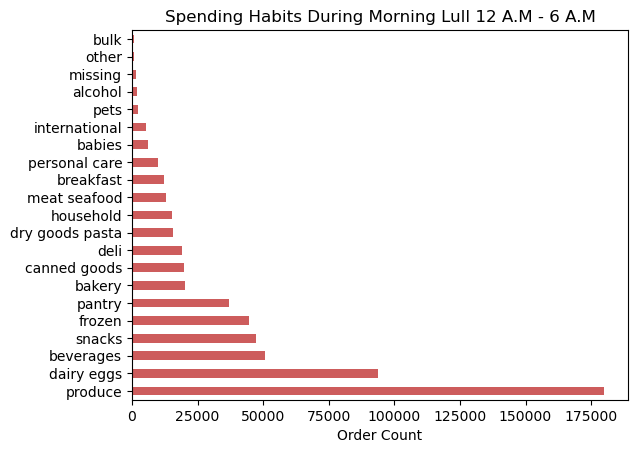

In [18]:
# creating bar chart on spending habits for morning lull
bar_dep_lull = df_lull['department'].value_counts().plot.barh(stacked = True, color = ['indianred'])
plt.title('Spending Habits During Morning Lull 12 A.M - 6 A.M')
plt.xlabel('Order Count', fontsize=10)
plt.show()

In [19]:
# creating subsets based on time_flag categories - Morning Rise
df_rise = df_merged[df_merged['time_flag'] == 'Morning Rise']

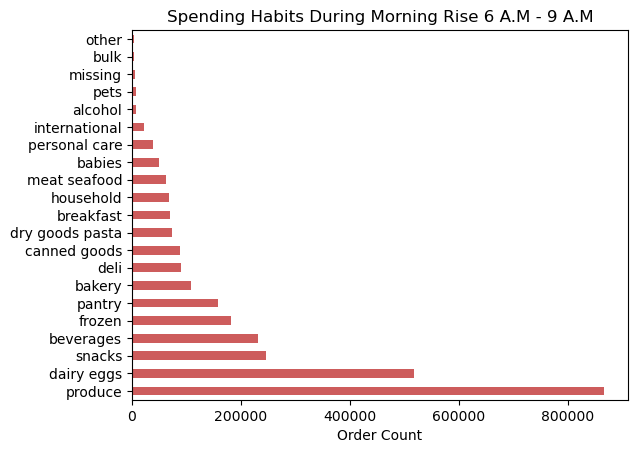

In [20]:
# creating bar chart on spending habits for morning rise
bar_dep_rise = df_rise['department'].value_counts().plot.barh(stacked = True, color = ['indianred'])
plt.title('Spending Habits During Morning Rise 6 A.M - 9 A.M')
plt.xlabel('Order Count', fontsize=10)
plt.show()

In [21]:
# creating subsets based on time_flag categories - Peak Hours
df_peak = df_merged[df_merged['time_flag'] == 'Peak']

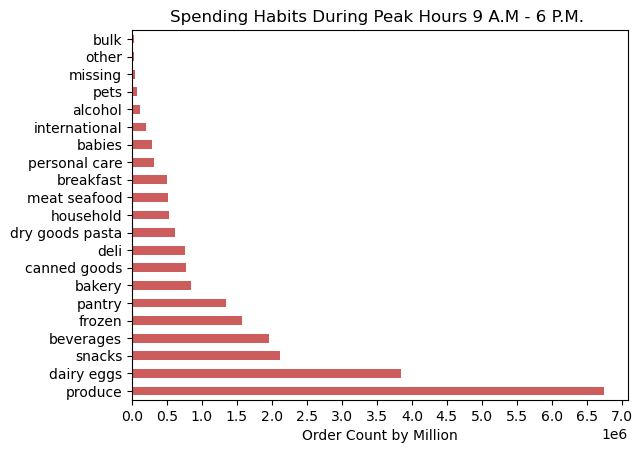

In [22]:
# creating bar chart on spending habits for peak hours
bar_dep_peak = df_peak['department'].value_counts().plot.barh(stacked = True, color = ['indianred'])
plt.title('Spending Habits During Peak Hours 9 A.M - 6 P.M. ')
plt.xlabel('Order Count by Million', fontsize=10)
plt.xticks([0, 500000, 1000000, 1500000, 2000000, 2500000, 3000000, 3500000, 4000000, 4500000, 5000000, 5500000, 6000000, 6500000, 7000000])
plt.show()

In [23]:
# creating subsets based on time_flag categories - Evening Fall
df_fall = df_merged[df_merged['time_flag'] == 'Evening Fall']

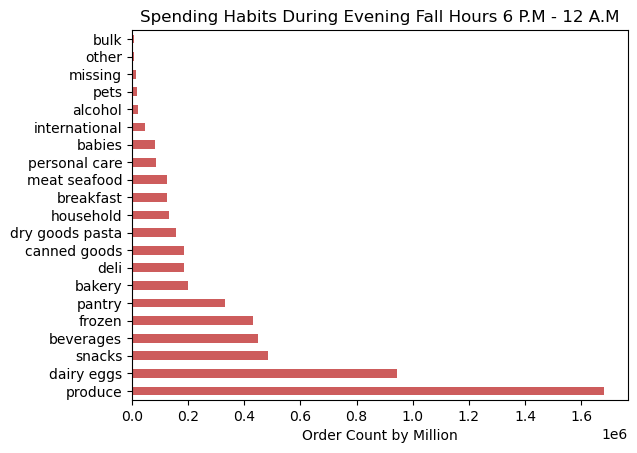

In [24]:
# creating bar chart on spending habits for evening hours
bar_dep_fall = df_fall['department'].value_counts().plot.barh(stacked = True, color = ['indianred'])
plt.title('Spending Habits During Evening Fall Hours 6 P.M - 12 A.M')
plt.xlabel('Order Count by Million', fontsize=10)
plt.show()

In [25]:
# creating crosstab of time_flag and loyalty_flag
crosstab_dep_time = pd.crosstab(df_merged['department'], df_merged['time_flag'], dropna = False)

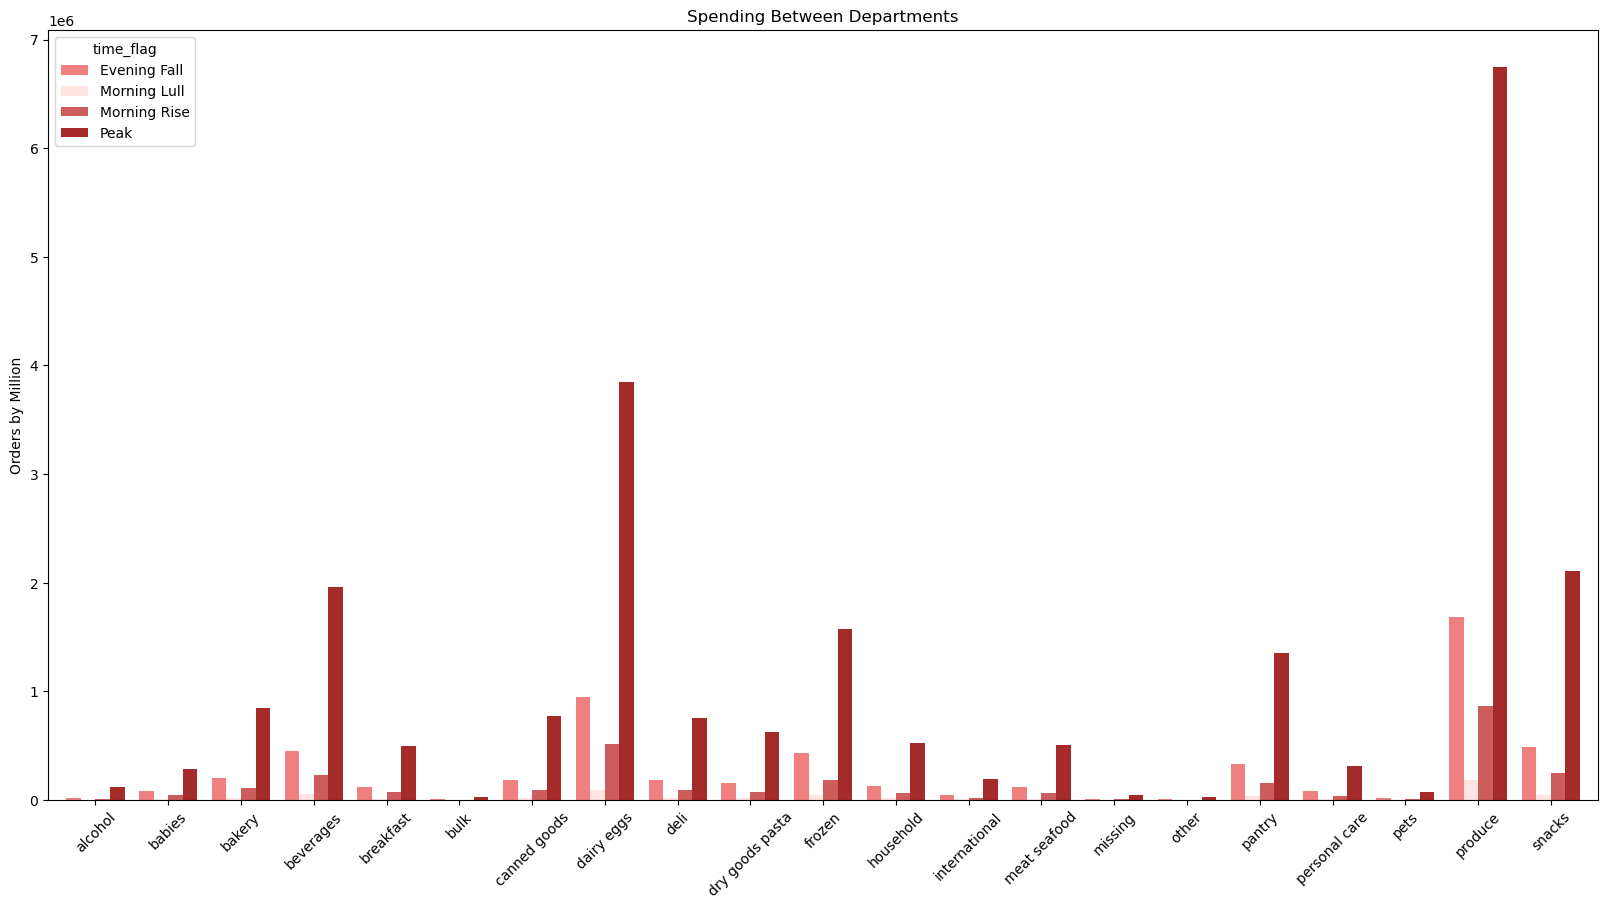

In [34]:
# creating bar chart of crosstab_dep_time
bar_dep_time = crosstab_dep_time.plot.bar(figsize = (20,10), color = ['lightcoral', 'mistyrose', 'indianred', 'brown'], width = 0.8)
plt.title('Spending Between Departments')
plt.xticks(rotation = 45)
plt.xlabel('')
plt.ylabel('Orders by Million')
plt.show()